# 라이브러리 불러오기

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
import os as os
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
import scipy as sp
from scipy.special import boxcox1p
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from scipy.stats import uniform
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from imblearn.under_sampling import *
from imblearn.over_sampling import *
from imblearn.combine import *
from sklearn.impute import SimpleImputer
plt.style.use('seaborn')

# 데이터 불러오기

In [0]:
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Crime/train.csv',parse_dates=['Dates'])
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Crime/test.csv',parse_dates=['Dates'],index_col='Id')
sample_submission = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Crime/sampleSubmission.csv')

In [0]:
train.Dates.describe()

count                  878049
unique                 389257
top       2011-01-01 00:01:00
freq                      185
first     2003-01-06 00:01:00
last      2015-05-13 23:53:00
Name: Dates, dtype: object

In [0]:
train

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541
...,...,...,...,...,...,...,...,...,...
878044,2003-01-06 00:15:00,ROBBERY,ROBBERY ON THE STREET WITH A GUN,Monday,TARAVAL,NONE,FARALLONES ST / CAPITOL AV,-122.459033,37.714056
878045,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948
878046,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,SOUTHERN,NONE,5TH ST / FOLSOM ST,-122.403390,37.780266
878047,2003-01-06 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,SOUTHERN,NONE,TOWNSEND ST / 2ND ST,-122.390531,37.780607


In [0]:
test

,Dates,DayOfWeek,PdDistrict,Address,X,Y
Id,,,,,,
0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
...,...,...,...,...,...,...
884257,2003-01-01 00:01:00,Wednesday,MISSION,2600 Block of BRYANT ST,-122.408983,37.751987
884258,2003-01-01 00:01:00,Wednesday,NORTHERN,1900 Block of WASHINGTON ST,-122.425342,37.792681
884259,2003-01-01 00:01:00,Wednesday,INGLESIDE,5500 Block of MISSION ST,-122.445418,37.712075


Dates - 범죄가 일어난 일시

Category - 범죄 유형 (이 값이 Target variable임)

Descript - 범죄에 대한 자세한 설명

DayOfWeek - 요일

PdDistrict - 경찰 관할 지역 명칭

Resolution - 범죄 해결 여부

Address - 범죄 발생 주소

X - 경도(Longitude)

Y - 위도(Latitude)

In [0]:
test_id=test.index

In [0]:
test_id=pd.DataFrame(test_id)

# 데이터 구조 변경

중복된 값 및 이상치 제거

In [0]:
train.duplicated().sum()

2323

In [0]:
train.drop_duplicates(inplace=True)
train

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541
...,...,...,...,...,...,...,...,...,...
878044,2003-01-06 00:15:00,ROBBERY,ROBBERY ON THE STREET WITH A GUN,Monday,TARAVAL,NONE,FARALLONES ST / CAPITOL AV,-122.459033,37.714056
878045,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948
878046,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,SOUTHERN,NONE,5TH ST / FOLSOM ST,-122.403390,37.780266
878047,2003-01-06 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,SOUTHERN,NONE,TOWNSEND ST / 2ND ST,-122.390531,37.780607


In [0]:
outlier=[660485, 660711, 660712, 661106, 666430, 667042, 669946, 671709,
            673078, 673114, 673115, 673510, 674043, 675070, 675073, 675288,
            675540, 677036, 677260, 677268, 677828, 678326, 678539, 678540,
            679643, 682780, 683862, 684406, 685719, 685720, 686997, 687519,
            687527, 688950, 692258, 712309, 719993, 727080, 754828, 756059,
            759292, 759397, 767318, 767501, 767502, 772415, 772431, 773159,
            783919, 788574, 788575, 789255, 798834, 823378, 833362, 833921,
            839585, 842259, 842261, 842434, 842435, 842828, 844995, 845842,
            852880, 857248, 871198]

In [0]:
len(outlier)

67

In [0]:
train=train.drop(index=outlier)
train

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541
...,...,...,...,...,...,...,...,...,...
878044,2003-01-06 00:15:00,ROBBERY,ROBBERY ON THE STREET WITH A GUN,Monday,TARAVAL,NONE,FARALLONES ST / CAPITOL AV,-122.459033,37.714056
878045,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948
878046,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,SOUTHERN,NONE,5TH ST / FOLSOM ST,-122.403390,37.780266
878047,2003-01-06 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,SOUTHERN,NONE,TOWNSEND ST / 2ND ST,-122.390531,37.780607


데이터 구조 변경

In [0]:
def feature_engineering(data):
    data['Date'] = pd.to_datetime(data['Dates'].dt.date)
    data['n_days'] = (
        data['Date'] - data['Date'].min()).apply(lambda x: x.days)
    data['Day'] = data['Dates'].dt.day
    data['DayOfWeek'] = data['Dates'].dt.weekday
    data['Month'] = data['Dates'].dt.month
    data['Year'] = data['Dates'].dt.year
    data['Hour'] = data['Dates'].dt.hour
    data['Minute'] = data['Dates'].dt.minute
    data['Block'] = data['Address'].str.contains('block', case=False)
    
    data.drop(columns=['Dates','Date','Address'], inplace=True)
        
    return data

In [0]:
train = feature_engineering(train)
train.drop(columns=['Descript','Resolution'], inplace=True)
test = feature_engineering(test)
train

,Category,DayOfWeek,PdDistrict,X,Y,n_days,Day,Month,Year,Hour,Minute,Block
0,WARRANTS,2,NORTHERN,-122.425892,37.774599,4510,13,5,2015,23,53,False
1,OTHER OFFENSES,2,NORTHERN,-122.425892,37.774599,4510,13,5,2015,23,53,False
2,OTHER OFFENSES,2,NORTHERN,-122.424363,37.800414,4510,13,5,2015,23,33,False
3,LARCENY/THEFT,2,NORTHERN,-122.426995,37.800873,4510,13,5,2015,23,30,True
4,LARCENY/THEFT,2,PARK,-122.438738,37.771541,4510,13,5,2015,23,30,True
...,...,...,...,...,...,...,...,...,...,...,...,...
878044,ROBBERY,0,TARAVAL,-122.459033,37.714056,0,6,1,2003,0,15,False
878045,LARCENY/THEFT,0,INGLESIDE,-122.447364,37.731948,0,6,1,2003,0,1,True
878046,LARCENY/THEFT,0,SOUTHERN,-122.403390,37.780266,0,6,1,2003,0,1,False
878047,VANDALISM,0,SOUTHERN,-122.390531,37.780607,0,6,1,2003,0,1,False


In [0]:
test

,DayOfWeek,PdDistrict,X,Y,n_days,Day,Month,Year,Hour,Minute,Block
Id,,,,,,,,,,,
0,6,BAYVIEW,-122.399588,37.735051,4512,10,5,2015,23,59,True
1,6,BAYVIEW,-122.391523,37.732432,4512,10,5,2015,23,51,False
2,6,NORTHERN,-122.426002,37.792212,4512,10,5,2015,23,50,True
3,6,INGLESIDE,-122.437394,37.721412,4512,10,5,2015,23,45,True
4,6,INGLESIDE,-122.437394,37.721412,4512,10,5,2015,23,45,True
...,...,...,...,...,...,...,...,...,...,...,...
884257,2,MISSION,-122.408983,37.751987,0,1,1,2003,0,1,True
884258,2,NORTHERN,-122.425342,37.792681,0,1,1,2003,0,1,True
884259,2,INGLESIDE,-122.445418,37.712075,0,1,1,2003,0,1,True


In [0]:
train['PdDistrict'].value_counts()

SOUTHERN      156520
MISSION       119722
NORTHERN      105093
BAYVIEW        89089
CENTRAL        85262
TENDERLOIN     81627
INGLESIDE      78718
TARAVAL        65396
PARK           49159
RICHMOND       45073
Name: PdDistrict, dtype: int64

타겟값 및 범주형 변수 인코딩

In [0]:
#PdDistrict , Category 변수를 LableEncoding

le1 = LabelEncoder()
train['PdDistrict'] = le1.fit_transform(train['PdDistrict'])
test['PdDistrict'] = le1.transform(test['PdDistrict'])

le2 = LabelEncoder()
train_x = train.drop(columns=['Category'])
train_y= le2.fit_transform(train['Category'])

In [0]:
train_x

,DayOfWeek,PdDistrict,X,Y,n_days,Day,Month,Year,Hour,Minute,Block
0,2,4,-122.425892,37.774599,4510,13,5,2015,23,53,False
1,2,4,-122.425892,37.774599,4510,13,5,2015,23,53,False
2,2,4,-122.424363,37.800414,4510,13,5,2015,23,33,False
3,2,4,-122.426995,37.800873,4510,13,5,2015,23,30,True
4,2,5,-122.438738,37.771541,4510,13,5,2015,23,30,True
...,...,...,...,...,...,...,...,...,...,...,...
878044,0,8,-122.459033,37.714056,0,6,1,2003,0,15,False
878045,0,2,-122.447364,37.731948,0,6,1,2003,0,1,True
878046,0,7,-122.403390,37.780266,0,6,1,2003,0,1,False
878047,0,7,-122.390531,37.780607,0,6,1,2003,0,1,False


In [0]:
train_y_d=pd.DataFrame(train_y)
train_y_d.apply(pd.value_counts)

,0
16,174305
21,125943
20,91911
1,76811
7,53919
36,53697
35,44580
37,42137
4,36599
32,31392


In [0]:
test

,DayOfWeek,PdDistrict,X,Y,n_days,Day,Month,Year,Hour,Minute,Block
Id,,,,,,,,,,,
0,6,0,-122.399588,37.735051,4512,10,5,2015,23,59,True
1,6,0,-122.391523,37.732432,4512,10,5,2015,23,51,False
2,6,4,-122.426002,37.792212,4512,10,5,2015,23,50,True
3,6,2,-122.437394,37.721412,4512,10,5,2015,23,45,True
4,6,2,-122.437394,37.721412,4512,10,5,2015,23,45,True
...,...,...,...,...,...,...,...,...,...,...,...
884257,2,3,-122.408983,37.751987,0,1,1,2003,0,1,True
884258,2,4,-122.425342,37.792681,0,1,1,2003,0,1,True
884259,2,2,-122.445418,37.712075,0,1,1,2003,0,1,True


시각화

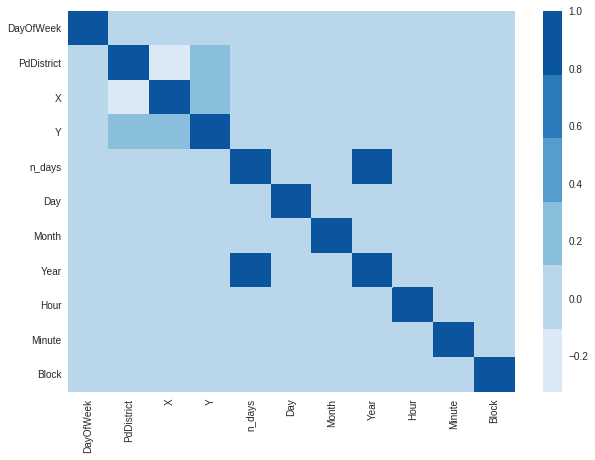

In [0]:
corr = train.corr()
cmap = sns.color_palette("Blues")
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corr, cmap=cmap)

## n_day를 고려해야함

언더샘플링(TomekLinks)

In [0]:
tl=TomekLinks()
tl_train_x,tl_train_y = tl.fit_sample(train_x, train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
tl_X_train=pd.DataFrame(tl_train_x)
tl_X_train.columns=['DayOfWeek',	'PdDistrict',	'X',	'Y',	'n_days',	'Day',	'Month',	'Year',	'Hour','Minute',	'Block']
tl_X_train

,DayOfWeek,PdDistrict,X,Y,n_days,Day,Month,Year,Hour,Minute,Block
0,2.0,4.0,-122.425892,37.774599,4510.0,13.0,5.0,2015.0,23.0,53.0,0.0
1,2.0,4.0,-122.425892,37.774599,4510.0,13.0,5.0,2015.0,23.0,53.0,0.0
2,2.0,4.0,-122.424363,37.800414,4510.0,13.0,5.0,2015.0,23.0,33.0,0.0
3,2.0,4.0,-122.426995,37.800873,4510.0,13.0,5.0,2015.0,23.0,30.0,1.0
4,2.0,5.0,-122.438738,37.771541,4510.0,13.0,5.0,2015.0,23.0,30.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
666842,0.0,6.0,-122.472985,37.782552,0.0,6.0,1.0,2003.0,0.0,31.0,0.0
666843,0.0,0.0,-122.389769,37.730564,0.0,6.0,1.0,2003.0,0.0,20.0,1.0
666844,0.0,0.0,-122.389769,37.730564,0.0,6.0,1.0,2003.0,0.0,20.0,1.0
666845,0.0,2.0,-122.447364,37.731948,0.0,6.0,1.0,2003.0,0.0,1.0,1.0


In [0]:
tl_y_d=pd.DataFrame(tl_train_y)
tl_y_d.apply(pd.value_counts)

,0
16,126660
21,100866
20,62537
1,60265
7,49112
36,41874
37,36251
35,29301
4,23396
32,21576


K-FOld CV

In [0]:
# CV model
xgb=XGBClassifier()
kfold = StratifiedKFold(n_splits=5)
results = cross_val_score(xgb, tl_X_train, tl_train_y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

홀드아웃(tl)

In [0]:
from sklearn.model_selection import train_test_split
tl_X_train, tl_X_valid, tl_y_train, tl_y_valid = train_test_split(tl_X_train, tl_train_y, \
                                                  test_size=0.2, random_state=42, stratify = tl_train_y)


In [0]:
tl_X_valid=pd.DataFrame(tl_X_valid)
tl_X_valid.columns=['DayOfWeek',	'PdDistrict',	'X',	'Y',	'n_days',	'Day',	'Month',	'Year',	'Hour','Minute',	'Block']
tl_X_valid

,DayOfWeek,PdDistrict,X,Y,n_days,Day,Month,Year,Hour,Minute,Block
197312,2.0,7.0,-122.409893,37.780113,3278.0,28.0,12.0,2011.0,13.0,29.0,1.0
118680,4.0,8.0,-122.474506,37.722113,3784.0,17.0,5.0,2013.0,0.0,1.0,1.0
533057,3.0,5.0,-122.432311,37.768377,878.0,2.0,6.0,2005.0,17.0,30.0,1.0
616693,6.0,3.0,-122.407538,37.765783,314.0,16.0,11.0,2003.0,2.0,0.0,0.0
454763,1.0,2.0,-122.448702,37.739277,1450.0,26.0,12.0,2006.0,0.0,45.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
246408,3.0,9.0,-122.412193,37.781605,2929.0,13.0,1.0,2011.0,3.0,58.0,1.0
287634,2.0,8.0,-122.468612,37.729598,2648.0,7.0,4.0,2010.0,9.0,45.0,0.0
329399,1.0,3.0,-122.419561,37.752959,2346.0,9.0,6.0,2009.0,17.0,45.0,1.0
329297,3.0,1.0,-122.407327,37.790399,2348.0,11.0,6.0,2009.0,1.0,0.0,1.0


# 모델링

In [0]:
%%time
xgb_c1 = XGBClassifier(n_estimators=100, n_jobs=-1, learning_rate=0.05,max_depth=10)
xgb_c1.fit(tl_X_train,tl_y_train, early_stopping_rounds=10,eval_metric='mlogloss',eval_set=[(tl_X_train, tl_y_train), (tl_X_valid, tl_y_valid)])

[0]	validation_0-mlogloss:3.52094	validation_1-mlogloss:3.52824
Multiple eval metrics have been passed: 'validation_1-mlogloss' will be used for early stopping.

Will train until validation_1-mlogloss hasn't improved in 10 rounds.
[1]	validation_0-mlogloss:3.41369	validation_1-mlogloss:3.42696
[2]	validation_0-mlogloss:3.32523	validation_1-mlogloss:3.34415
[3]	validation_0-mlogloss:3.24948	validation_1-mlogloss:3.27335
[4]	validation_0-mlogloss:3.18321	validation_1-mlogloss:3.2116
[5]	validation_0-mlogloss:3.12432	validation_1-mlogloss:3.15698
[6]	validation_0-mlogloss:3.07047	validation_1-mlogloss:3.10726
[7]	validation_0-mlogloss:3.0215	validation_1-mlogloss:3.06231
[8]	validation_0-mlogloss:2.97653	validation_1-mlogloss:3.0212
[9]	validation_0-mlogloss:2.93527	validation_1-mlogloss:2.98369
[10]	validation_0-mlogloss:2.89667	validation_1-mlogloss:2.94871
[11]	validation_0-mlogloss:2.86084	validation_1-mlogloss:2.91638
[12]	validation_0-mlogloss:2.82731	validation_1-mlogloss:2.88621
[

In [56]:
xgb_c1_pred = xgb_c1.predict_proba(test)

KeyboardInterrupt: ignored

In [58]:
submission=pd.DataFrame(data=xgb_c1_pred)
submission=pd.concat([test_id,submission],axis=1)
submission.columns=sample_submission.columns
submission

,Id,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,EXTORTION,FAMILY OFFENSES,FORGERY/COUNTERFEITING,FRAUD,GAMBLING,KIDNAPPING,LARCENY/THEFT,LIQUOR LAWS,LOITERING,MISSING PERSON,NON-CRIMINAL,OTHER OFFENSES,PORNOGRAPHY/OBSCENE MAT,PROSTITUTION,RECOVERED VEHICLE,ROBBERY,RUNAWAY,SECONDARY CODES,SEX OFFENSES FORCIBLE,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
0,0,0.002846,0.067439,0.001917,0.002914,0.043580,0.004711,0.008580,0.026950,0.008582,0.002309,0.002267,0.006510,0.003308,0.007342,0.001913,0.009984,0.044502,0.003914,0.002556,0.037550,0.074146,0.142328,0.001848,0.002437,0.001844,0.014642,0.004287,0.018984,0.042185,0.001990,0.032582,0.002202,0.067117,0.001835,0.007166,0.046030,0.193922,0.027616,0.027165
1,1,0.002064,0.056707,0.001643,0.003727,0.002460,0.003867,0.009611,0.072569,0.006101,0.001632,0.001621,0.004825,0.002157,0.007466,0.002457,0.003856,0.015286,0.003158,0.001908,0.010370,0.028357,0.384379,0.001584,0.001671,0.001580,0.034060,0.001701,0.020165,0.002157,0.001706,0.034325,0.001614,0.046458,0.001573,0.001820,0.017317,0.047898,0.133756,0.024395
2,2,0.011294,0.118920,0.001891,0.002847,0.052846,0.004798,0.003618,0.049194,0.012599,0.002055,0.001919,0.002058,0.005044,0.010246,0.001851,0.006526,0.235571,0.003385,0.001956,0.015094,0.073277,0.072360,0.001788,0.038923,0.001776,0.031249,0.002271,0.027558,0.015219,0.001820,0.006668,0.001983,0.032474,0.001775,0.012699,0.062228,0.017828,0.033614,0.020778
3,3,0.004894,0.118714,0.001742,0.006261,0.018242,0.003781,0.008598,0.021956,0.008230,0.002167,0.002036,0.009167,0.005621,0.021283,0.001738,0.011651,0.062777,0.003821,0.002018,0.031166,0.053441,0.090781,0.001679,0.005035,0.001675,0.031194,0.003953,0.022769,0.020388,0.001808,0.009439,0.002025,0.040541,0.001667,0.010849,0.101792,0.145020,0.033100,0.076981
4,4,0.004894,0.118714,0.001742,0.006261,0.018242,0.003781,0.008598,0.021956,0.008230,0.002167,0.002036,0.009167,0.005621,0.021283,0.001738,0.011651,0.062777,0.003821,0.002018,0.031166,0.053441,0.090781,0.001679,0.005035,0.001675,0.031194,0.003953,0.022769,0.020388,0.001808,0.009439,0.002025,0.040541,0.001667,0.010849,0.101792,0.145020,0.033100,0.076981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884257,884257,0.002203,0.059910,0.019355,0.002992,0.025014,0.003246,0.002297,0.036896,0.003053,0.112193,0.002791,0.002934,0.074913,0.064031,0.002112,0.004283,0.074478,0.002186,0.002006,0.016805,0.042660,0.152074,0.001937,0.002247,0.001919,0.006577,0.004523,0.020523,0.035638,0.009482,0.008215,0.005476,0.045987,0.001924,0.005441,0.029885,0.076742,0.023581,0.011468
884258,884258,0.001837,0.081745,0.010865,0.001706,0.043620,0.003193,0.001962,0.013929,0.002299,0.064300,0.002274,0.003021,0.111044,0.060424,0.001755,0.002265,0.166241,0.001809,0.001671,0.010894,0.035134,0.201845,0.001612,0.005140,0.001596,0.003097,0.002034,0.007727,0.010035,0.001700,0.006598,0.002083,0.058953,0.001600,0.004140,0.022468,0.036229,0.007151,0.004001
884259,884259,0.003758,0.092751,0.021757,0.002454,0.032848,0.003015,0.004738,0.015495,0.002662,0.018832,0.005685,0.003055,0.096295,0.048351,0.002476,0.013475,0.077301,0.002488,0.002285,0.021342,0.038681,0.162351,0.002204,0.003067,0.002183,0.004264,0.005059,0.019168,0.038027,0.005778,0.005368,0.019914,0.035320,0.002189,0.006444,0.038855,0.073339,0.059539,0.007186
884260,884260,0.006231,0.035963,0.021815,0.002463,0.020178,0.007787,0.001809,0.019312,0.002920,0.014150,0.003309,0.002312,0.046167,0.052946,0.002169,0.007208,0.047976,0.002972,0.001580,0.017956,0.036546,0.242049,0.001526,0.002219,0.001511,0.002838,0.004522,0.013591,0.022583,0.004001,0.003701,0.004759,0.029879,0.001515,0.008967,0.030226,0.246353,0.015712,0.010279


In [0]:
submission.to_csv('/content/drive/My Drive/Colab Notebooks/Crime/Crime(xgb)_sample_submission.csv', index=False)